>Download train.csv from here
>
>> https://www.kaggle.com/c/digit-recognizer/data
>
>and unzip it inside a new folder named ***"large_files"***

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import util


In [44]:
class BayesClassifier:
    def fit(self, X, y):
        # Number of classes
        self.K = len(set(y))
        # Distribution of each class k
        self.gaussians = []
        
        for k in range(self.K):
            Xk = X[y==k]
            mean = np.mean(Xk, axis=0)
            cov  = np.cov(Xk.T)
            gaussian_k = {'mean': mean,
                          'cov' : cov}
            self.gaussians.append(gaussian_k)
    
    def sample_given_y (self, y):
        gaussian_k = self.gaussians[y]
        mean = gaussian_k['mean']
        cov  = gaussian_k['cov']
        return np.random.multivariate_normal(mean, cov)
    
    def sample(self):
        y = np.random.randint(self.K)
        return self.sample_given_y(y)
    

In [45]:
X,y = util.get_mnist()

Reading in and transforming data...


In [46]:
X.shape

(42000, 784)

In [47]:
y.shape

(42000,)

In [48]:
Xtoy = X[0:420, :]
ytoy = y[0:420]

In [49]:
clf = BayesClassifier()

In [50]:
clf.fit(Xtoy, ytoy)

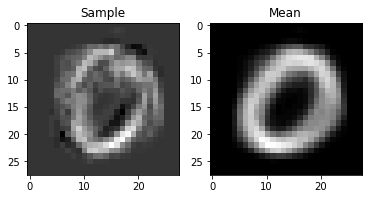

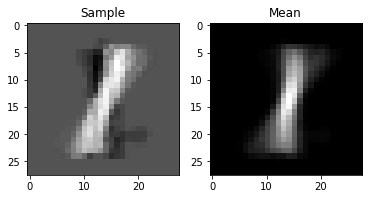

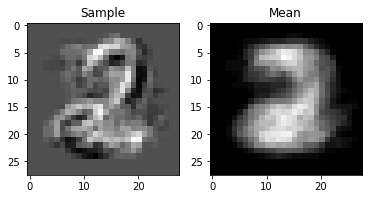

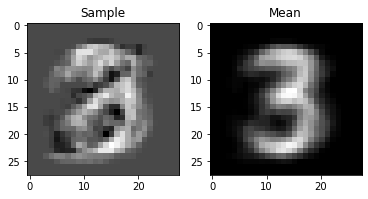

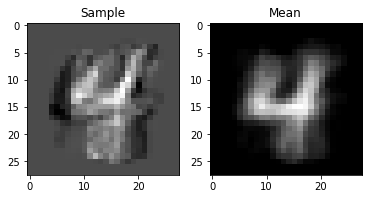

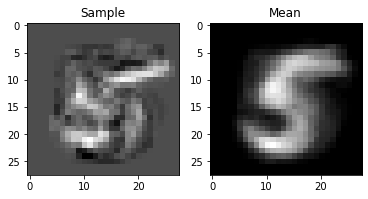

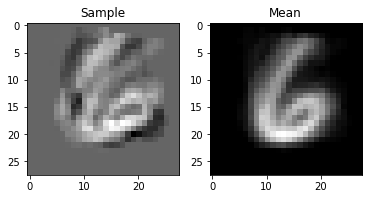

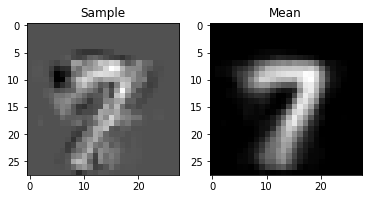

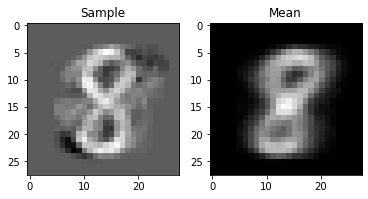

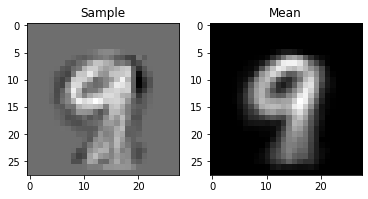

In [51]:
for k in range(clf.K):
    sample = clf.sample_given_y(k)
    mean   = clf.gaussians[k]['mean']
    
    plt.subplot(1,2,1)
    plt.imshow(sample.reshape(28,28), cmap='gray')
    plt.title('Sample')
    
    plt.subplot(1,2,2)
    plt.imshow(mean.reshape(28,28), cmap='gray')
    plt.title('Mean')
    
    plt.show()
    

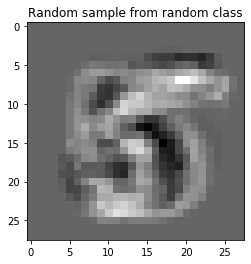

In [66]:
sample = clf.sample()

plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title('Random sample from random class')
plt.show()